In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [3]:
df = pd.read_csv('Ads_CTR_Optimisation.csv')
df.head(20)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
5,1,1,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0
7,1,1,0,0,1,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0


In [4]:
#implementing Thompson Sampling
N = 10000
d = 10
ads_selected = []
number_of_rewards_1 = [0] * d
numbre_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0,N):
    ad = 0
    max_random = 0
    for i in range(0,d):
        random_beta = random.betavariate(number_of_rewards_1[i]+1,numbre_of_rewards_0[i]+1)
        if(random_beta>max_random):
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = df.values[n,ad]
    if(reward == 1):
        number_of_rewards_1[ad] += 1
    else:
        numbre_of_rewards_0[ad] += 1
    total_reward += reward

print('total reward ',total_reward)
print('Best ad to select ',ads_selected[9999]+1)

total reward  2585
Best ad to select  5


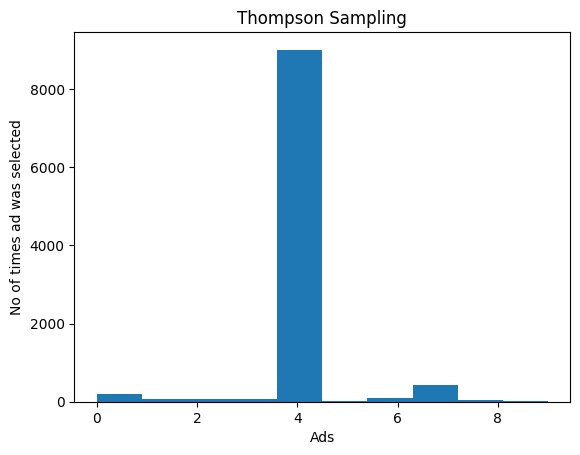

In [5]:
plt.hist(ads_selected)
plt.title('Thompson Sampling')
plt.xlabel('Ads')
plt.ylabel('No of times ad was selected')
plt.show()